In [1]:
# remember to build these environment
# !pip3 install pandas
# !pip3 install matplotlib
# !pip3 install cartopy
# !pip3 install geopandas contextily
# !pip3 install metpy

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
import contextily as cx
from shapely.geometry import LineString
from metpy.plots import SkewT
from metpy.units import units
from matplotlib.lines import Line2D


# CSV File Reading Part
##### **" A successfully made diagram for a successfully lauched rocket :P "**

##### First : Time variation graph >>

In [3]:
# Read the CSV file in the same folder, and calculate a few data needed
data = pd.read_csv(r'testing_web_sorting_data_set.csv')  # 替換為你的文件名稱
filtered_data = data[
    (data['Slope_X'] >= 0) & (data['Slope_X'] <= 2000) &
    (data['Slope_Y'] >= -200) & (data['Slope_Y'] <= 200) &
    (data['Slope_Z'] >= -10) & (data['Slope_Z'] <= 20) 
]

# Create an array that stores the average temperature
bmpdata = (data['BMP1_Temp'] + data['BMP2_Temp'])/2

# Create an array that stores the average pressure
hpadata = (data['BMP1_Pressure'] + data['BMP2_Pressure'])/2

# change this later :
# data['Average_humidity'] = (data['BMP1_Temp'] + data['BMP2_Temp']) / 2 
print(bmpdata)

# set graph's line color
line1_color = "#999210" # Height
line2_color = "#267CD2" # velocity
line3_color = "#D92127" # acceleration

# set time's variable
totalTime = len(data) - 1
print(f'total time : {totalTime}(s)')

0        0.000000
1       26.516069
2       26.496344
3       26.497672
4       26.499470
          ...    
1780    25.828576
1781    25.827410
1782    21.146097
1783    25.822371
1784    25.822423
Length: 1785, dtype: float64
total time : 1784(s)


In [4]:
# write a function to plot data
def plot_data(time_row, velocity_column, acceleration_column, height_column, unit_t, unit_v, unit_a, unit_h): 
    # update the resolution of the plot
    plt.figure(dpi=300)

    # plot the data
    plt.plot(filtered_data[time_row], filtered_data[height_column], label=f'({unit_h})', linewidth=1, color=line1_color)
    plt.plot(filtered_data[time_row], filtered_data[velocity_column], label=f'({unit_v})', linewidth=1, color=line2_color)
    plt.plot(filtered_data[time_row], filtered_data[acceleration_column], label=f'({unit_a})', linewidth=1, color=line3_color)

    # set x-axis label with unit
    plt.xlabel(f"Time({unit_t})")

    # set y-axis label with unit
    plt.ylabel('value')
    
    plt.title('Time variation graph')
    plt.grid(True)
    plt.show()

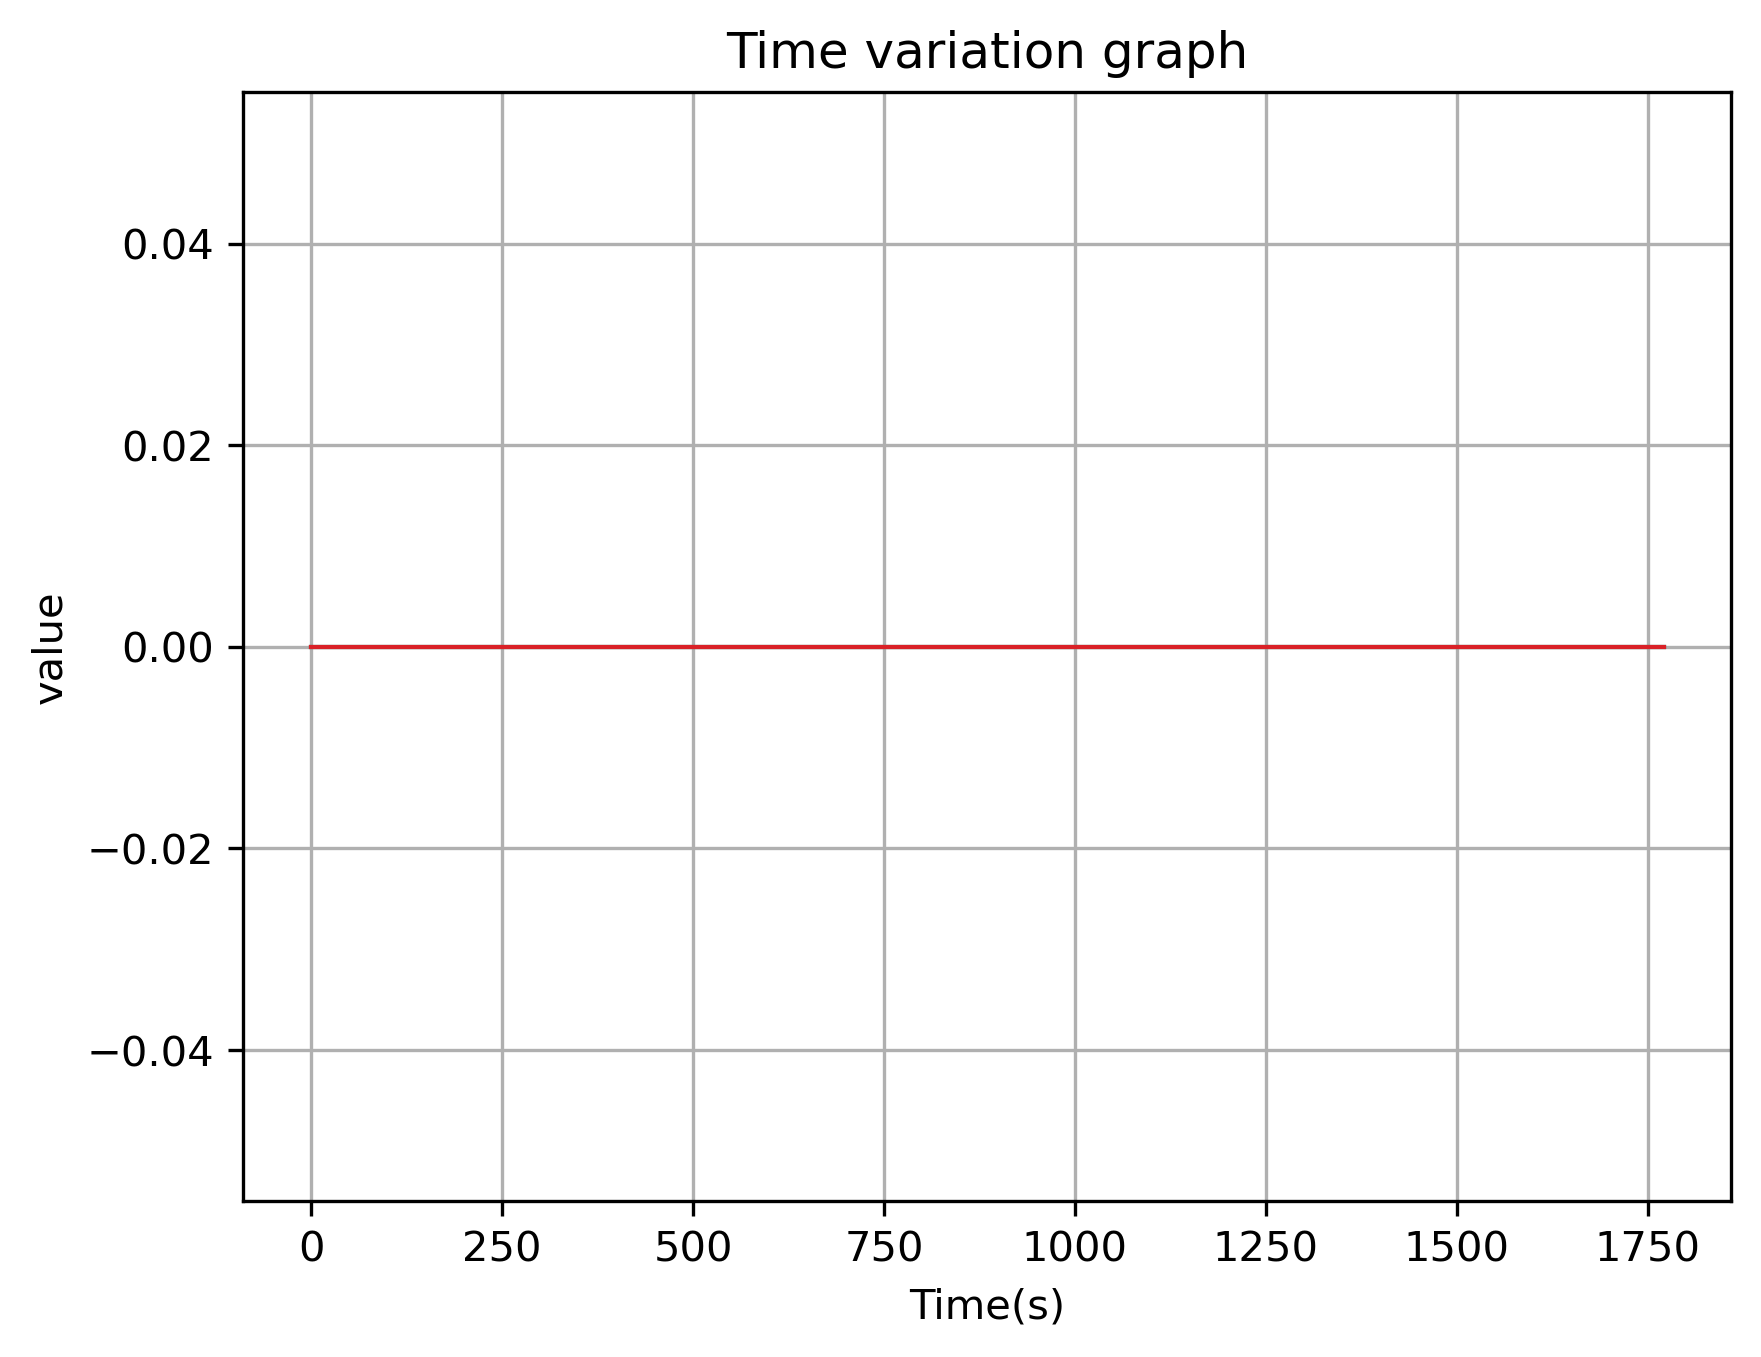

In [5]:
# call the function, and draw the graph !!
plot_data('index', 'Slope_Y', "Slope_Z", "Slope_X", "s", "m/s", "m/s²", "m") 

#### Second : Skew-T Log-P Diagram >>

temperature-alt graph :

In [6]:
# Same, write a function to plot data
def plot_data(hieght_row, humidity_column, unit_c, unit_p, unit_h): 
    # update the resolution of the plot
    fig = plt.subplots(figsize=(10, 6), dpi=500)

    # plot the data
    plt.plot(data[hieght_row], bmpdata, label=f'({unit_c})', linewidth=0.5, color=line1_color)
    # plt.plot(filtered_data[hieght_row], filtered_data[humidity_column], label=f'({unit_p})', color=line2_color)

    # set x-axis label with unit
    plt.xlabel(f"Height({unit_h})")

    # set y-axis label with unit
    plt.ylabel('Temperature(ºC)')

    # set legend
    lines1, labels1 = plt.gca().get_legend_handles_labels()
    plt.legend(lines1, labels1, loc='best')
    
    plt.title('Temperature vs. altitude')
    plt.grid(True)
    plt.show()

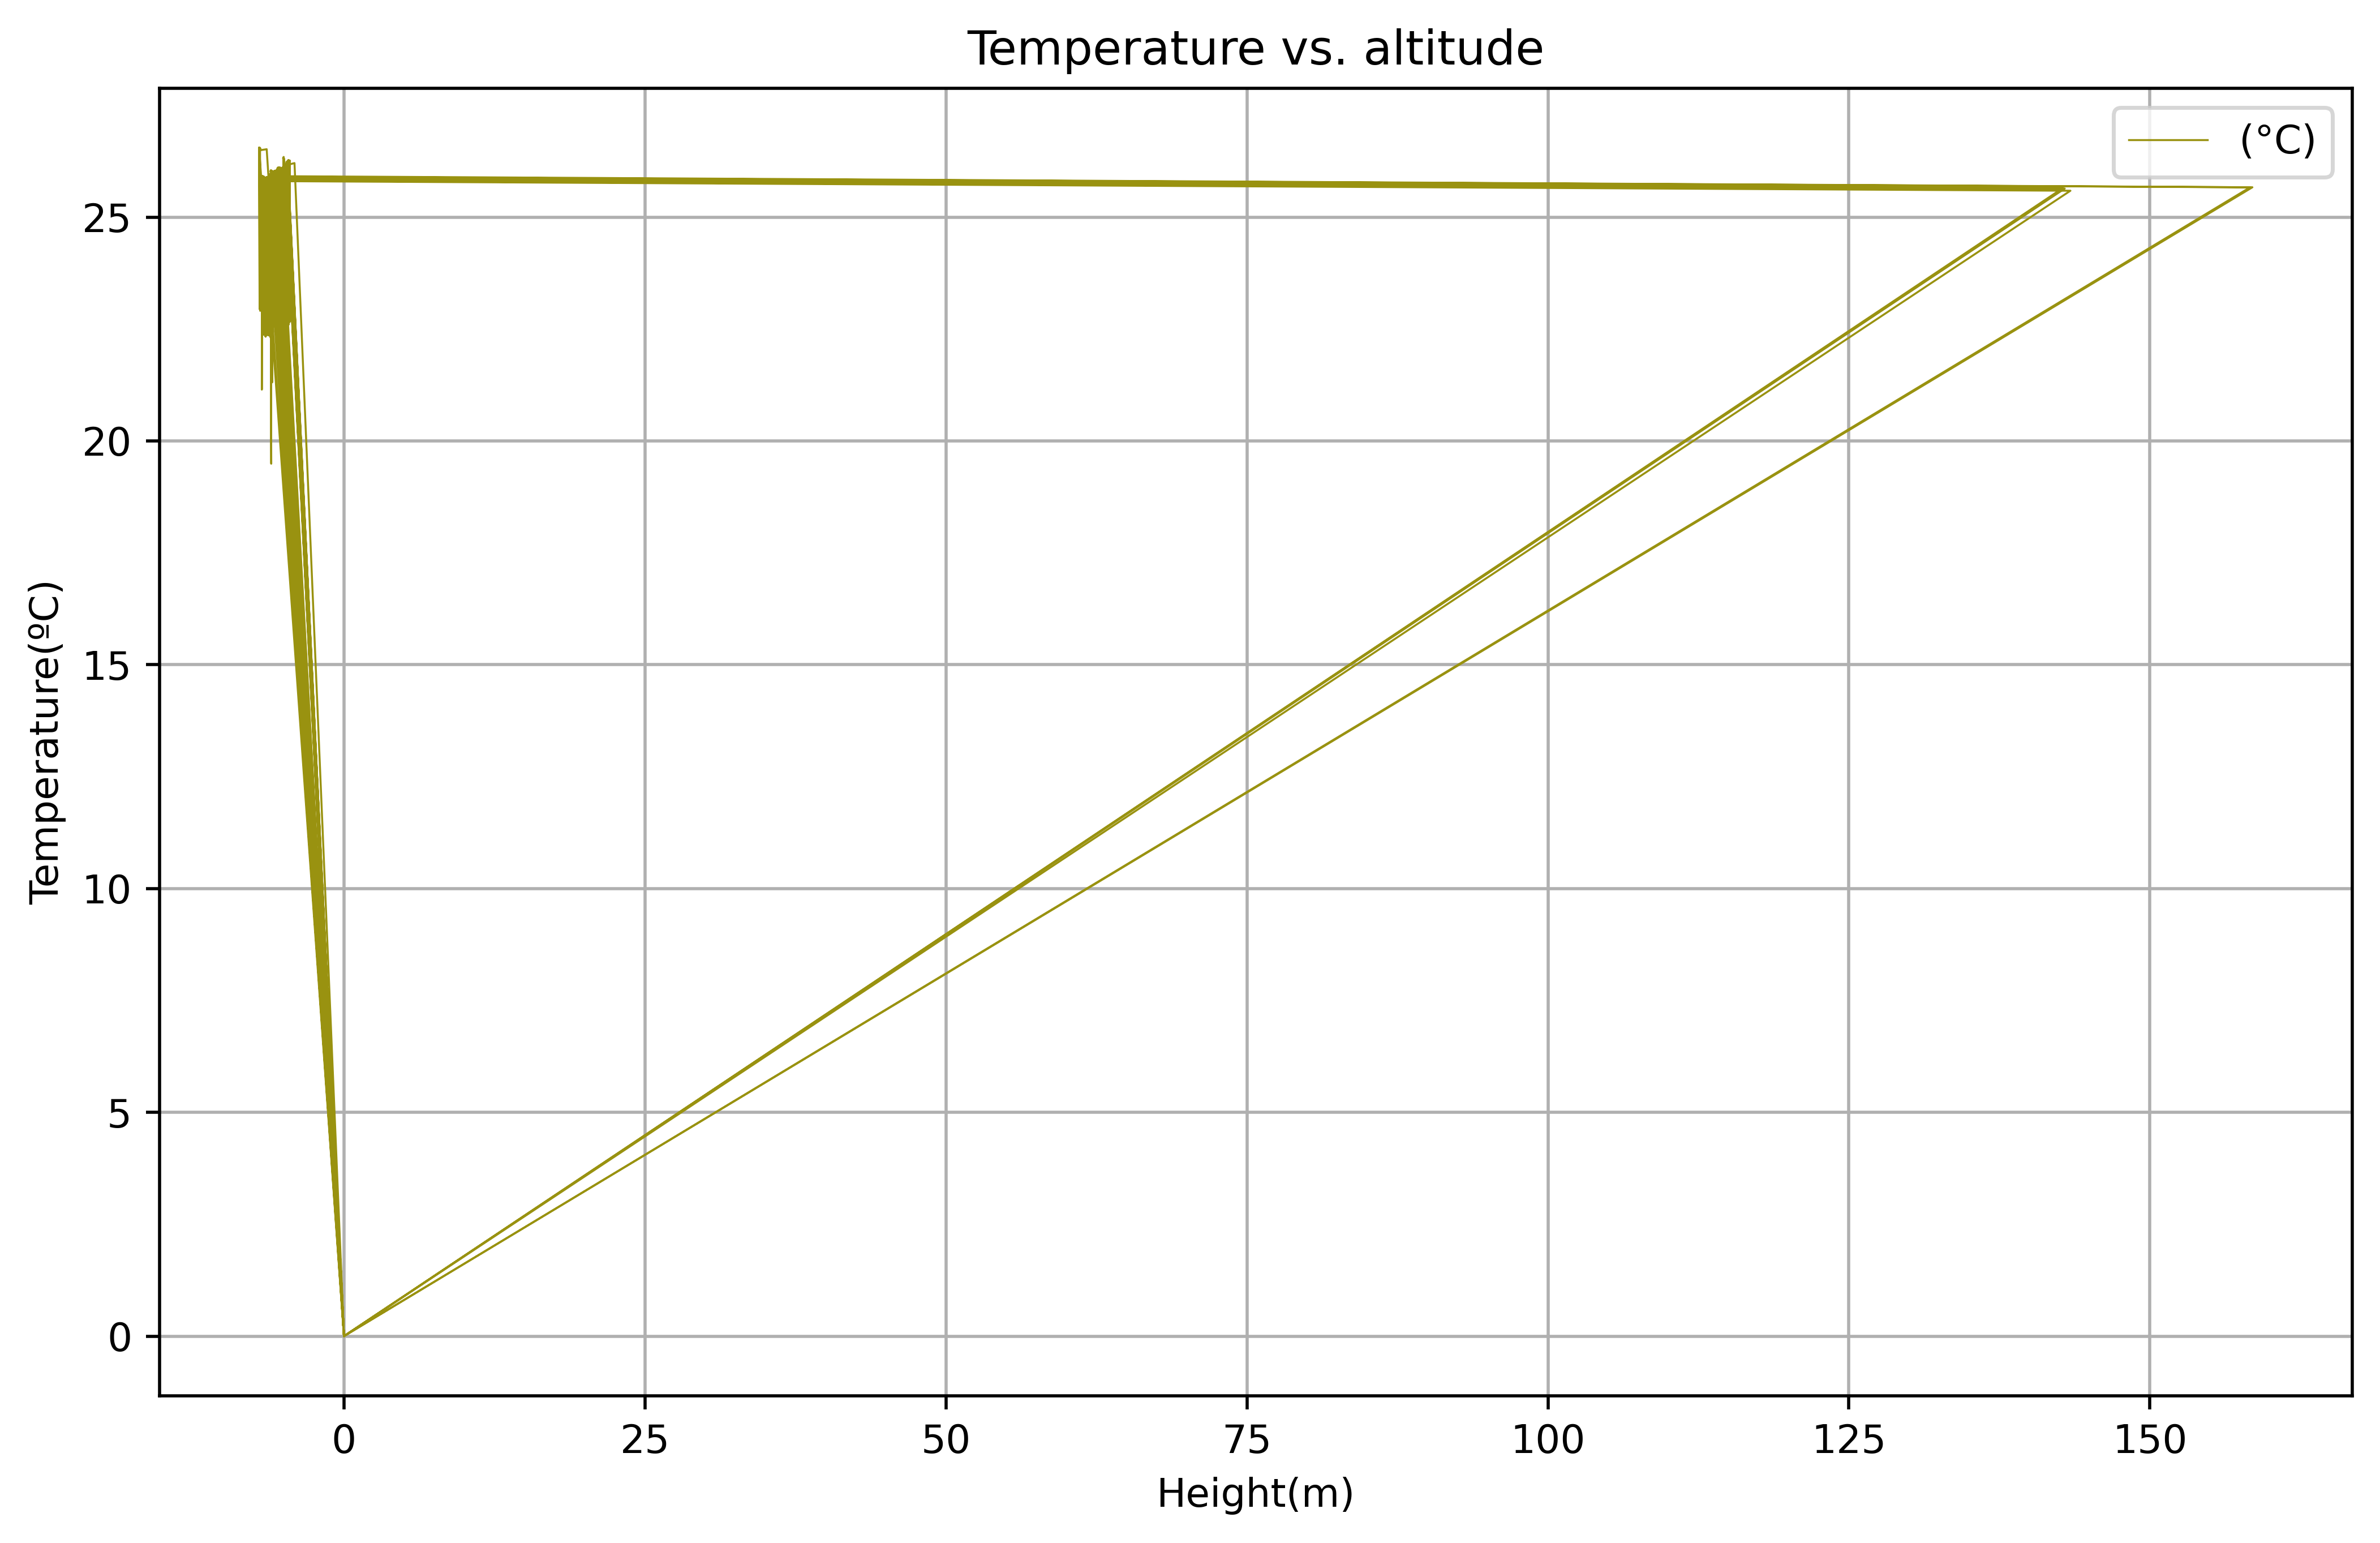

In [7]:
# Same, call the function, and draw the graph !!
plot_data('Slope_X', "Gyro_X", "°C", "%", "m") 

temperature-alt / humidity-alt graph :

In [8]:
# Same, write a function to plot data
def plot_data(hieght_row, humidity_column, unit_c, unit_p, unit_h): 
    # update the resolution of the plot
    fig = plt.subplots(figsize=(10, 6), dpi=500)

    # plot the data
    plt.plot(data[hieght_row], bmpdata, label=f'({unit_c})', linewidth=1, color=line1_color)
    plt.plot(data[hieght_row], data[humidity_column], label=f'({unit_p})', linewidth=1, color=line2_color)

    # set x-axis label with unit
    plt.xlabel(f"Height({unit_h})")

    # set y-axis label with unit
    plt.ylabel('value')

    # set legend
    lines1, labels1 = plt.gca().get_legend_handles_labels()
    plt.legend(lines1, labels1, loc='best')

    plt.title('temp-alt / humid-alt')
    plt.grid(True)
    plt.show()

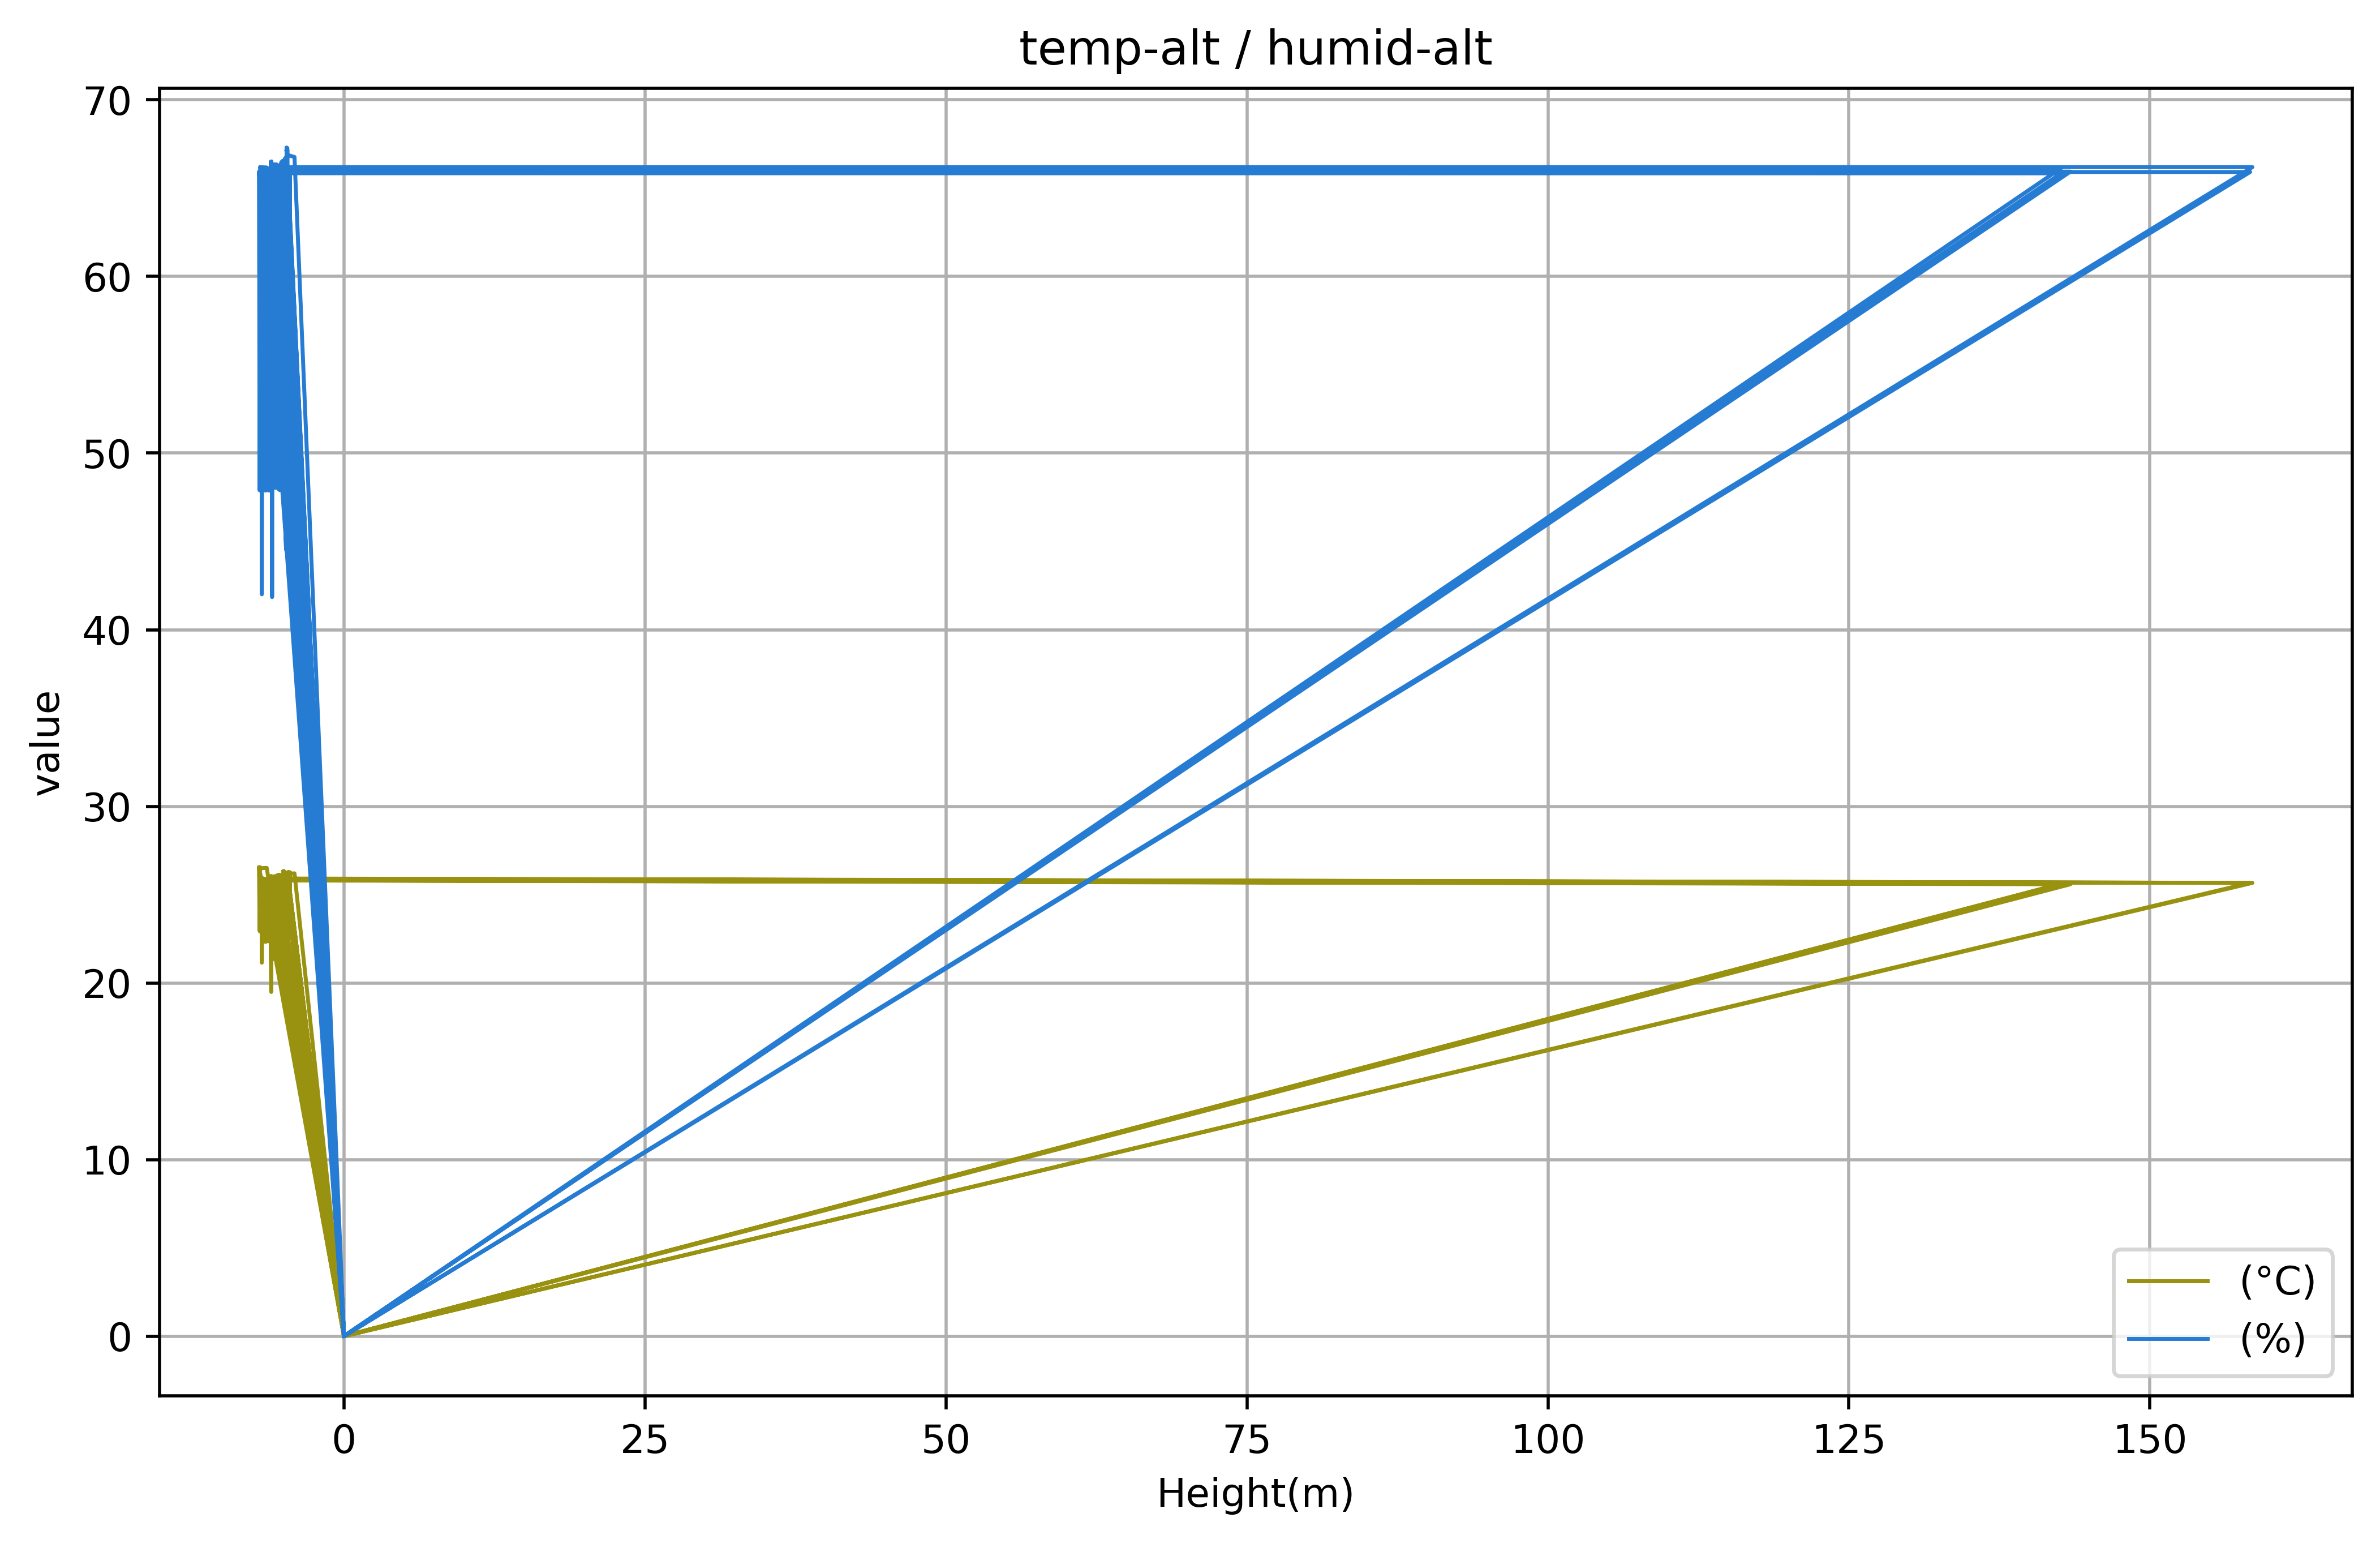

In [9]:
# Same, call the function, and draw the graph !!
plot_data('Slope_X', "Gyro_X", "°C", "%", "m") 

Skew-T Log-P Diagram : (finally...)

In [10]:
# # Same, write a function to plot data
# def plot_data(hieght_column, unit_hpa, unit_h, unit_c): 
#     # update the resolution of the plot
#     fig, ax1 = plt.subplots(figsize=(10, 6), dpi=500)

#     # declare duet-y-axis variable
#     ax2 = ax1.twinx()

#     # plot the data
#     ax1.plot(bmpdata, hpadata, label=f'({unit_hpa})', linewidth=1, color=line2_color)
#     ax2.plot(bmpdata, data[hieght_column], label=f'({unit_h})', linewidth=1, color=line3_color)

#     # Add isobars (horizontal lines)
#     isobar_levels = np.arange(100, 1001, 100)
#     for p in isobar_levels:
#         ax1.axhline(y=p, color='lightgray', linewidth=0.5, linestyle='--')

#     # Add isotherms (vertical temperature lines)
#     isotherm_levels = np.arange(-40, 50, 10)
#     for t in isotherm_levels:
#         ax1.axvline(x=t, color='lightblue', linewidth=0.5, linestyle='--')

#     # Optional: Plot dew point (if available)
#     if 'dewdata' in globals():
#         ax1.plot(dewdata, hpadata, label='Dew Point (°C)', linewidth=1, color='blue', linestyle=':')

#     # set x-axis label with unit
#     ax1.set_xlabel(f"temperature({unit_c})")
    
#     # set y-axis label with unit
#     ax1.set_ylabel('Pressure(hPa)')
#     ax2.set_ylabel('Height(m)')
    
#     # set legend
#     lines1, labels1 = ax1.get_legend_handles_labels()
#     lines2, labels2 = ax2.get_legend_handles_labels()
#     ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')


#     plt.title('Skew-T Log-P Diagram')
#     fig.tight_layout()  # adjusts layout to prevent label clipping
#     ax1.grid(True)
#     plt.show()

In [11]:
def plot_data(hieght_column, unit_hpa, unit_h, unit_c):
    """
    Draw a Skew-T Log-P diagram using MetPy.
    Uses:
        - bmpdata: temperature (°C)
        - hpadata: pressure (hPa)
        - data[hieght_column]: height (m)
        - dewdata (optional): dew point temperature (°C)
    """
    # Prepare variables with units
    temperature = bmpdata * units.degC
    pressure = hpadata * units.hPa
    height = data[hieght_column] * units.meter

    # Optional dew point
    dewpoint = dewdata * units.degC if 'dewdata' in globals() else None

    # Create Skew-T plot
    fig = plt.figure(figsize=(9, 9), dpi=500)
    skew = SkewT(fig)

    # Plot temperature profile
    skew.plot(pressure, temperature, 'r', label=f'Temperature ({unit_c})')

    # Plot dew point if available
    if dewpoint is not None:
        skew.plot(pressure, dewpoint, 'b', linestyle=':', label='Dew Point (°C)')

    # Thermodynamic reference lines
    skew.plot_dry_adiabats(linewidth=0.5, alpha=0.6)
    skew.plot_moist_adiabats(linewidth=0.5, alpha=0.6)
    skew.plot_mixing_lines(linewidth=0.5, alpha=0.6)

    # Set limits
    skew.ax.set_ylim(1000, 100)  # Pressure decreasing
    skew.ax.set_xlim(-40, 50)    # Temperature range in °C

    # Overlay height on secondary axis
    ax2 = skew.ax.twinx()
    ax2.set_ylim(skew.ax.get_ylim())
    ax2.plot(bmpdata, data[hieght_column], color='darkred', linestyle='--', linewidth=1, label=f'Height ({unit_h})')
    ax2.set_ylabel(f"Height ({unit_h})")

    # Labels and legend
    skew.ax.set_xlabel(f"Temperature ({unit_c})")
    skew.ax.set_ylabel(f"Pressure ({unit_hpa})")
    skew.ax.set_title("Skew-T Log-P Diagram")

    # Combine legends from both axes
    lines1, labels1 = skew.ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    skew.ax.legend(lines1 + lines2, labels1 + labels2, loc='best')

    plt.grid(True)
    plt.tight_layout()
    plt.show()

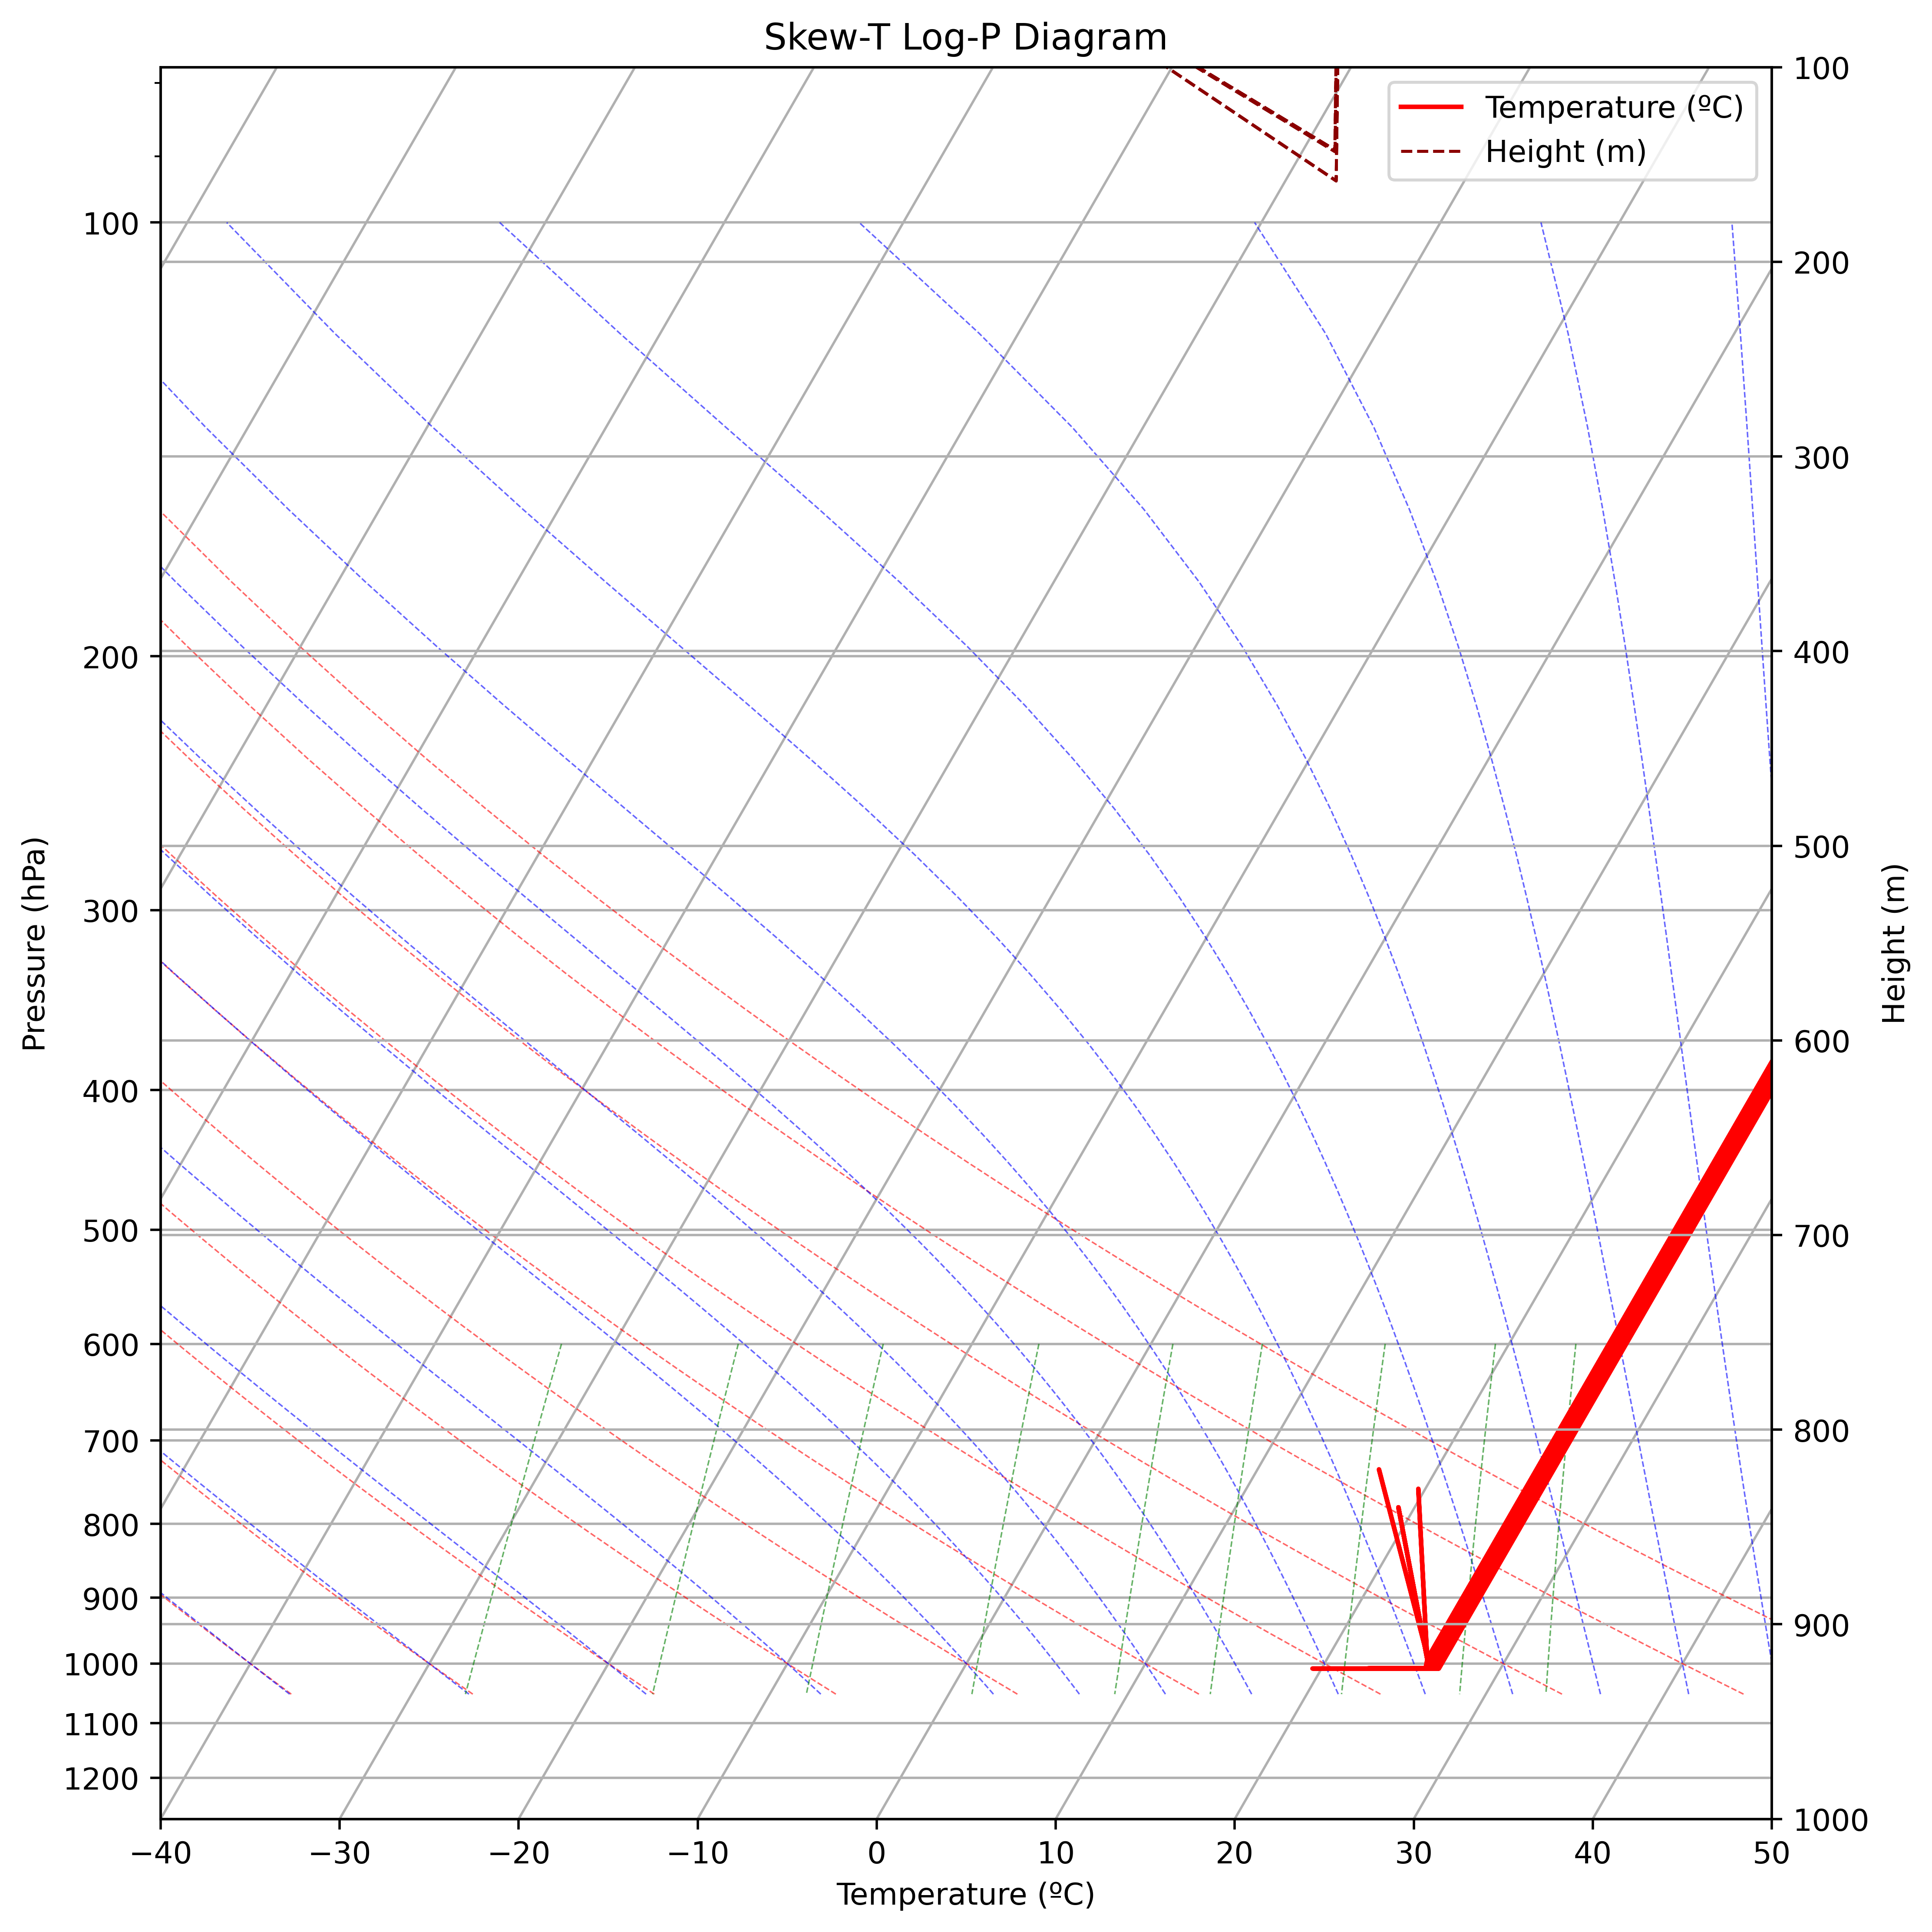

In [12]:
# Same, call the function, and draw the graph !!
plot_data('Slope_X', "hPa", "m", "ºC") 

3D Flight Trajectory :

In [13]:
# Constants for WGS84
a = 6378137.0  # Equatorial radius in meters
e_sq = 6.69437999014e-3  # Square of eccentricity

# define a few variables, yeah just a few...
# ref_lat = data['GPS_Latitude'].dropna().iloc[0] # select the first non-nan value of GPS_Latitude
# ref_lon = data['GPS_Longitude'].dropna().iloc[0] # select the first non-nan value of GPS_Longitude
ref_lat = 24.76374742816596 # substitude this later, it's incorrect, only for testing stage
ref_lon = 121.58655259689635 # substitude this later, it's incorrect, only for testing stage
# cur_lat = data['GPS_Latitude']
# cur_lon = data['GPS_Longitude']
# cur_alt = data['Slope_X']
cur_lat = [24.76374742816596, 24.75804952695217, 24.705616578527255, 24.634056]
cur_lon = [121.58655259689635, 121.6245150319256, 121.61196546717706, 121.603808]
cur_alt = [0, 100, 200, 300]  # substitude this later, it's incorrect, only for testing stage

In [14]:
# write functions to convert GPS coordinates to ENU coordinates

def geodetic_to_ecef(lat, lon, alt):
    #Convert WGS84 geodetic to ECEF coordinates.
    lat = np.radians(lat)
    lon = np.radians(lon)
    N = a / np.sqrt(1 - e_sq * np.sin(lat)**2)

    x = (N + alt) * np.cos(lat) * np.cos(lon)
    y = (N + alt) * np.cos(lat) * np.sin(lon)
    z = ((1 - e_sq) * N + alt) * np.sin(lat)
    return x, y, z

def ecef_to_enu(x, y, z, ref_lat, ref_lon, ref_alt):
    #Convert ECEF to local ENU coordinates.
    x0, y0, z0 = geodetic_to_ecef(ref_lat, ref_lon, ref_alt)

    dx = x - x0
    dy = y - y0
    dz = z - z0

    ref_lat = np.radians(ref_lat)
    ref_lon = np.radians(ref_lon)

    t = np.array([
        [-np.sin(ref_lon), np.cos(ref_lon), 0],
        [-np.sin(ref_lat)*np.cos(ref_lon), -np.sin(ref_lat)*np.sin(ref_lon), np.cos(ref_lat)],
        [ np.cos(ref_lat)*np.cos(ref_lon),  np.cos(ref_lat)*np.sin(ref_lon), np.sin(ref_lat)]
    ])

    enu = t @ np.vstack((dx, dy, dz))
    return enu[0], enu[1]  # East, North

def gps_to_enu(cur_lat, cur_lon, cur_alt, ref_lat, ref_lon, ref_alt):
    # Convert multiple GPS coordinates to ENU (altitude directly from cur_alt)
    east_list, north_list = [], []

    for lat, lon, alt in zip(cur_lat, cur_lon, cur_alt):
        x, y, z = geodetic_to_ecef(lat, lon, alt)
        e, n = ecef_to_enu(x, y, z, ref_lat, ref_lon, ref_alt)
        east_list.append(e)
        north_list.append(n)

    return np.array(east_list), np.array(north_list), np.array(cur_alt)

In [15]:
# activate the function to run
gps_to_enu(cur_lat, cur_lon, cur_alt, ref_lat, ref_lon, 0)

# get function's return value
east, north, up = gps_to_enu(cur_lat, cur_lon, cur_alt, ref_lat, ref_lon, 0)

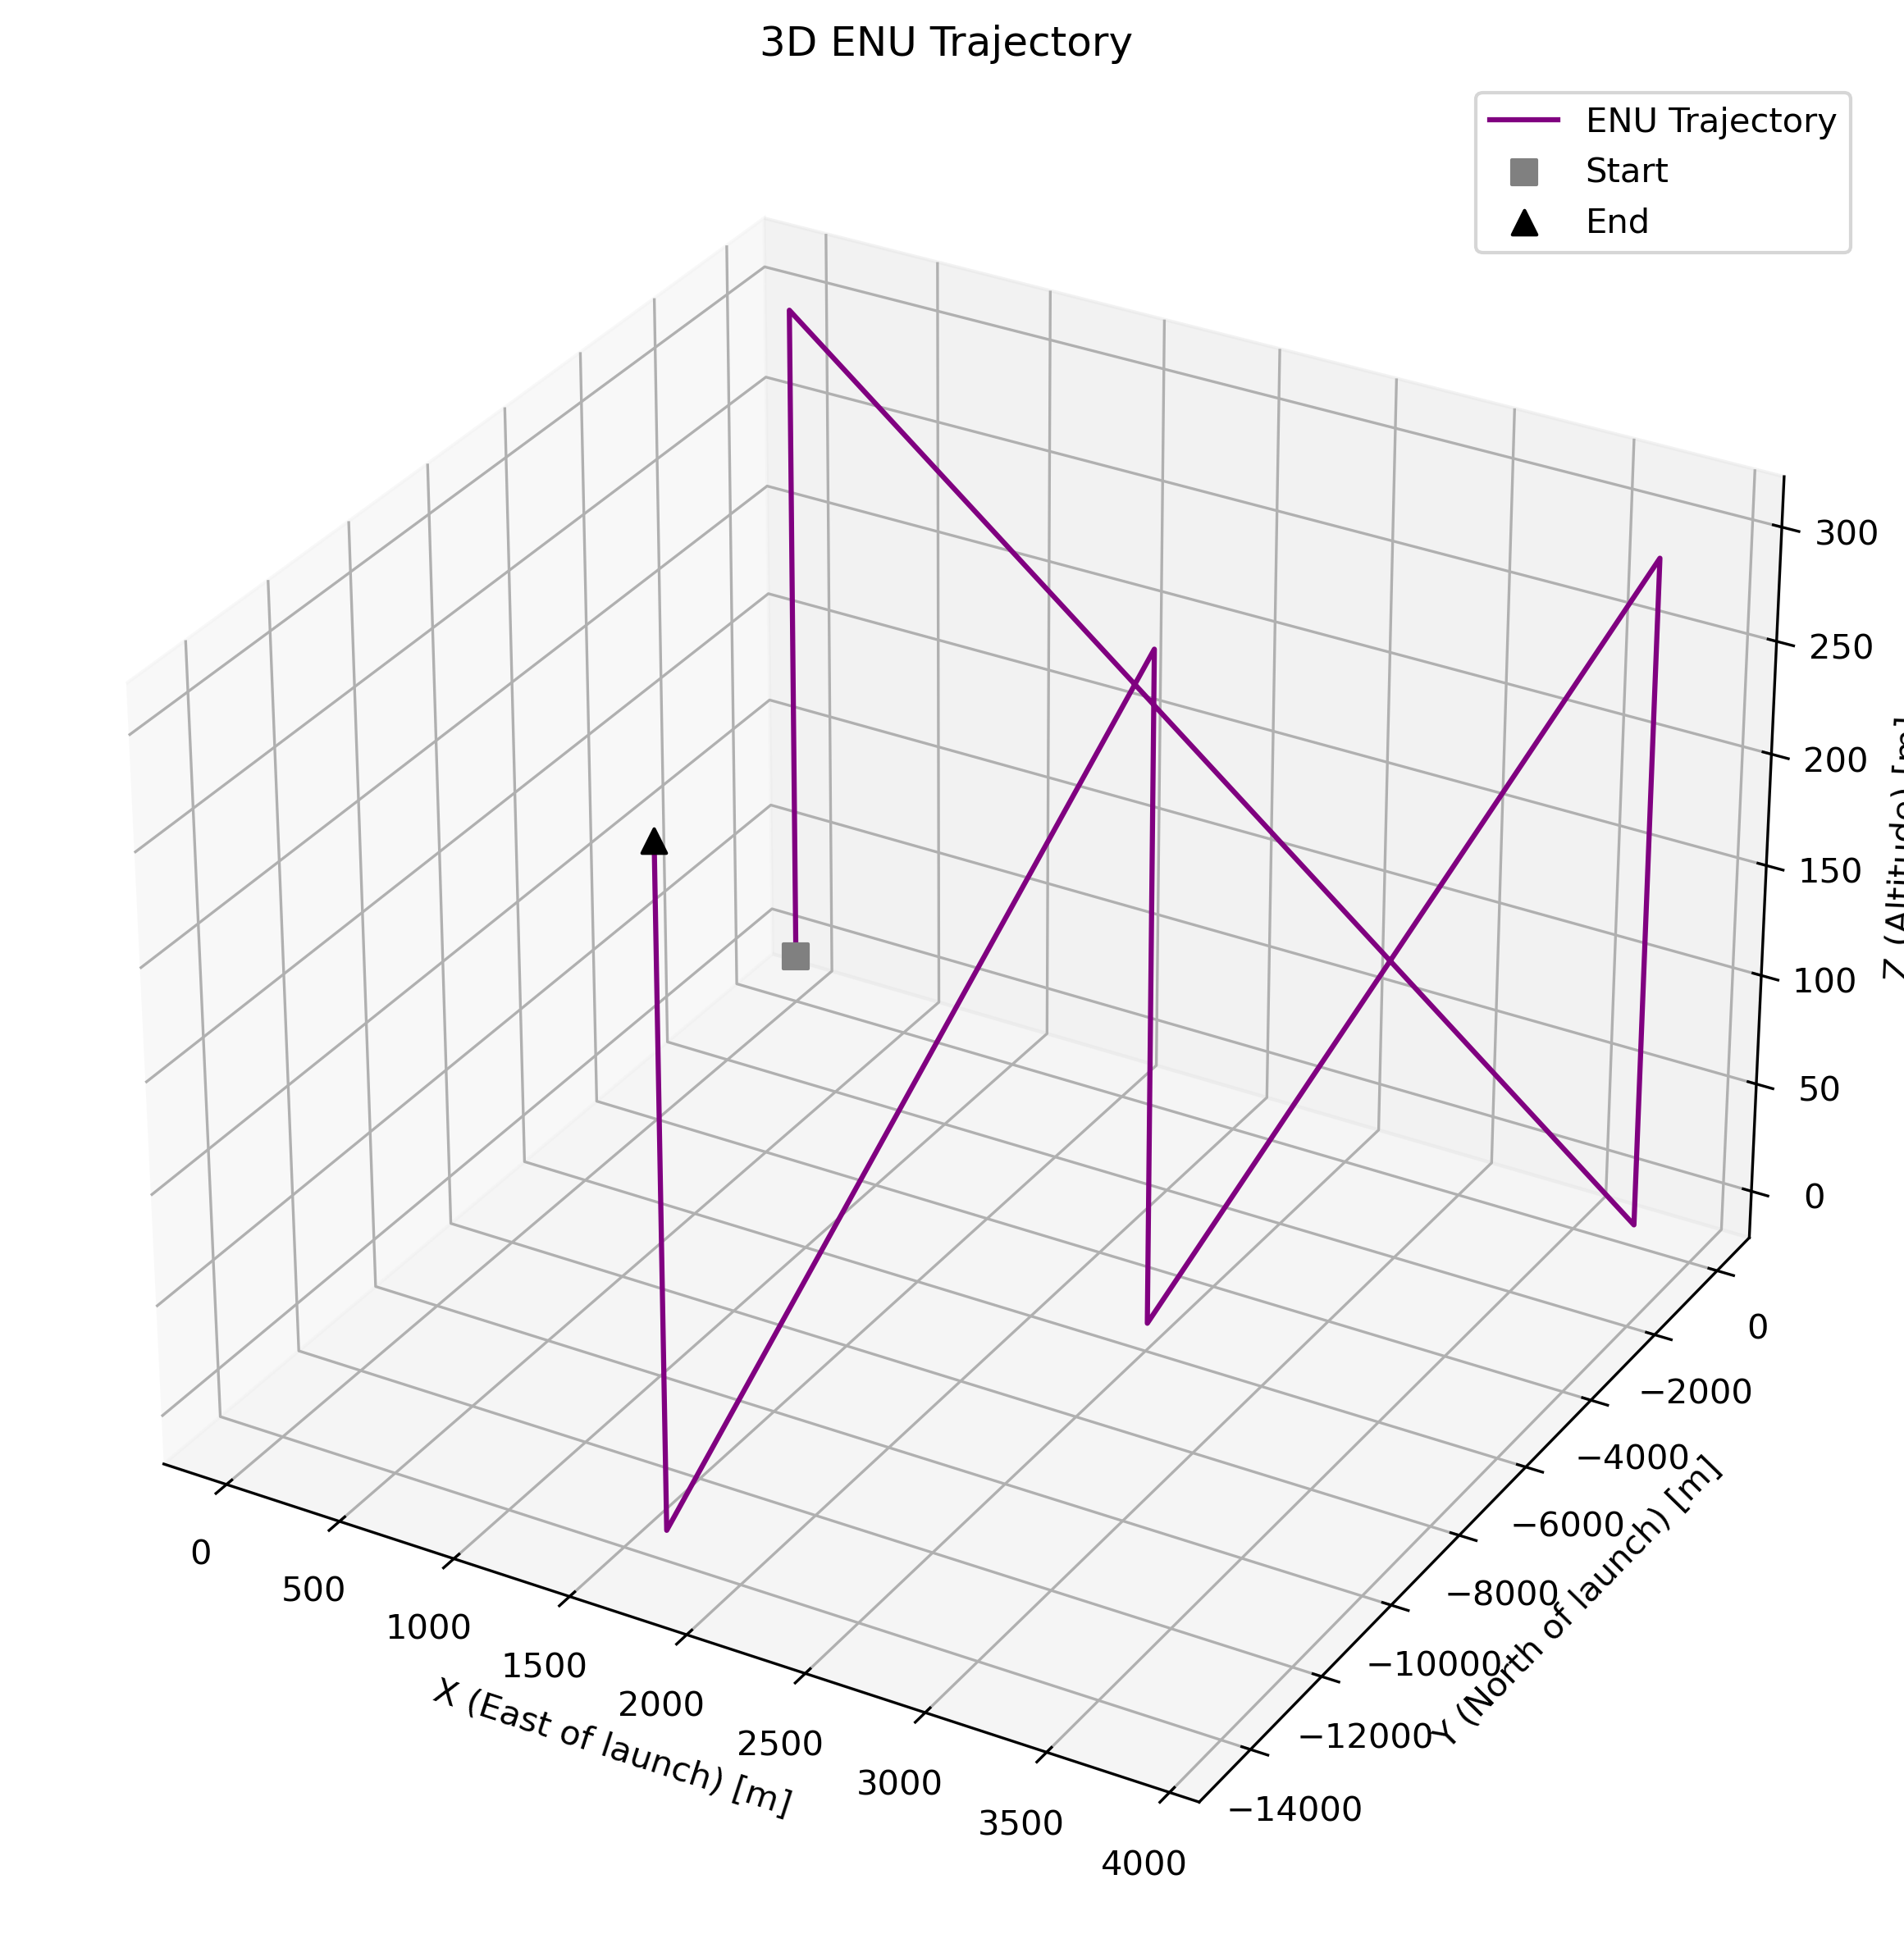

In [16]:
# decide the size and resolution of the plot
fig = plt.figure(figsize=(10, 8), dpi=300)
ax = fig.add_subplot(111, projection='3d')

# Plot the ENU trajectory
ax.plot(east, north, up, label='ENU Trajectory', linewidth=1.5, color='purple')

# 起點與終點標記
ax.scatter(east[0], north[0], up[0], color='gray', s=50, marker='s', label='Start')
ax.scatter(east[-1], north[-1], up[-1], color='black', s=50, marker='^', label='End')

# Set axis labels
ax.set_xlabel('X (East of launch) [m]')
ax.set_ylabel('Y (North of launch) [m]')
ax.set_zlabel('Z (Altitude) [m]')
ax.set_title('3D ENU Trajectory')

# Add legend and grid
ax.legend()
ax.grid(True)

# set limits
# ax.set_xlim(-100, 1000)
# ax.set_ylim(-300, 300)
# ax.set_zlim(0, 1200)

# Show the plot
plt.tight_layout()
plt.show()

In [17]:
# Same, write a function to plot data
def plot_data(time_row, velocity_column, acceleration_column, height_column, unit_t, unit_v, unit_a, unit_h): 
    # update the size and resolution of the plot
    fig, ax1 = plt.subplots(figsize=(10, 6), dpi=500)

    # declare duet-y-axis variable
    ax2 = ax1.twinx()

    # plot the data
    ax1.plot(data[time_row], data[height_column], label=f'({unit_h})', linewidth=1.5, color=line1_color)
    ax2.plot(data[time_row], data[velocity_column], label=f'({unit_v})', linestyle='--', linewidth=1.5, color=line2_color, zorder=2)
    ax2.plot(data[time_row], data[acceleration_column], label=f'({unit_a})', linewidth=1.5, color=line3_color, zorder=1)

    # set x-axis label with unit
    ax1.set_xlabel(f"Time({unit_t})")
    
    # set y-axis label with unit
    ax1.set_ylabel(f'Altitude({unit_h})', color='gray')
    ax2.set_ylabel(f'Velocity({unit_v}) / Acceleration({unit_a})', color='gray')

    # set y-axis(velocity, acceleration) color and limits
    ax2.tick_params(axis='y', labelcolor='gray')
    ax2.set_ylim(-50, 200)

    # set y-axis(height) color and limits
    ax1.tick_params(axis='y', labelcolor='gray')
    ax1.set_ylim(-300, 1200) 

    # create a legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels2 + labels1 , loc='best')
    
    plt.title('Flight Data: Altitude, Velocity, and Acceleration vs Time')
    fig.tight_layout()  # adjusts layout to prevent label clipping
    ax1.grid(True)
    plt.show()

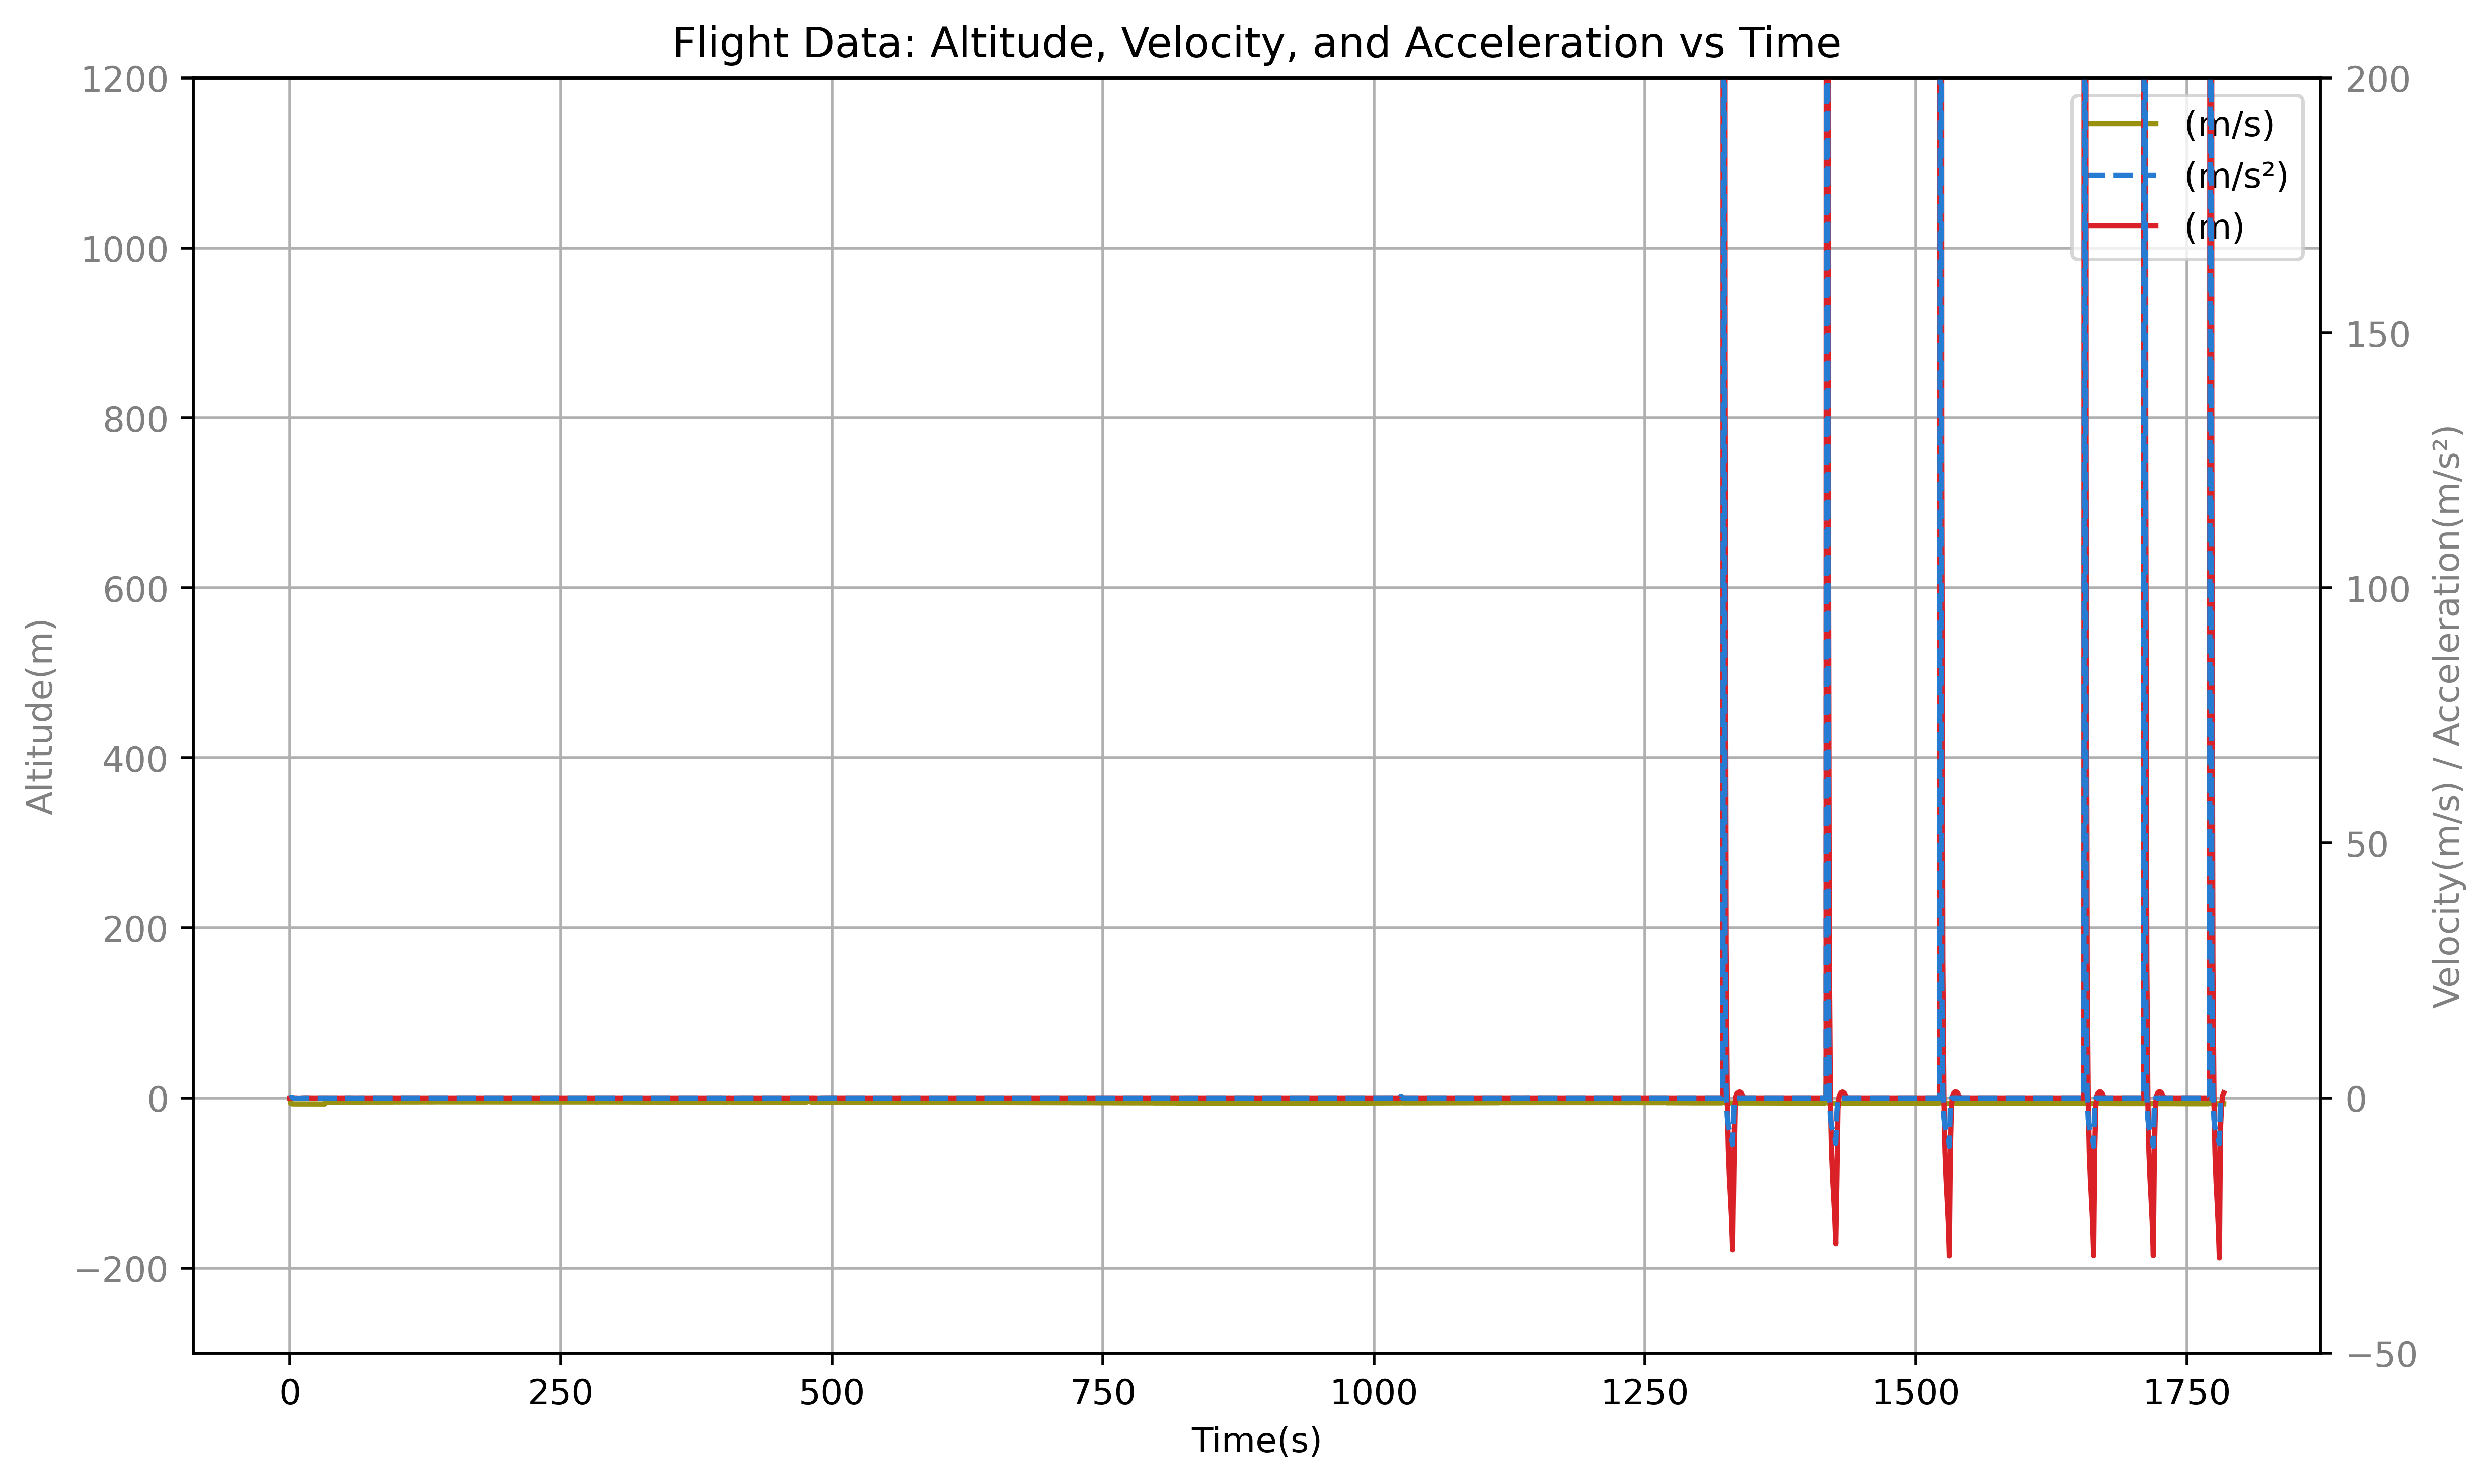

In [18]:
# secondly, call the function, and draw the graph !!
plot_data('index', 'Slope_Y', "Slope_Z", "Slope_X", "s", "m/s", "m/s²", "m") 

GPS trajectory map :

In [19]:
# hrk_lat = data['GPS_Latitude'].dropna().iloc[-1] # select the last non-nan value of GPS_Latitude
# hrk_lon = data['GPS_Longitude'].dropna().iloc[-1] # select the last non-nan value of GPS_Longitude
test_lat = [24.76374742816596, 24.75804952695217, 24.705616578527255, 24.634056]
test_lon = [121.58655259689635, 121.6245150319256, 121.61196546717706, 121.603808]

In [20]:
# def plot_data(lon_column, lat_row, lon_start, lat_start, lon_end, lat_end): 
#     # Create map figure
#     fig = plt.figure(figsize=(10, 8), dpi=300)
#     ax = plt.axes(projection=ccrs.PlateCarree())  # PlateCarree for raw lon/lat
    
#     # Add map features
#     ax.coastlines(resolution='10m')
#     ax.add_feature(cfeature.BORDERS)
#     ax.add_feature(cfeature.LAND, edgecolor='black')
#     ax.add_feature(cfeature.OCEAN)
#     ax.add_feature(cfeature.LAKES, edgecolor='black')
#     ax.add_feature(cfeature.RIVERS)

#     # Plot the GPS track
#     ax.plot(lon_column, lat_row, color=line2_color, linewidth=2, label='GPS Track', transform=ccrs.Geodetic())
    
#     # Mark start and end
#     ax.plot(lon_start, lat_start, marker='s', color='green', markersize=10, label='Start', transform=ccrs.Geodetic())
#     ax.plot(lon_end, lat_end, marker='^', color='red', markersize=10, label='End', transform=ccrs.Geodetic())

#     # Set extent (zoom to area)
#     # ax.set_extent([lon_column.min()-0.01, lon_column.max()+0.01, lat_row.min()-0.01, lat_row.max()+0.01])

#     # Add title and legend
#     plt.title("GPS trajectory map")
#     plt.legend()
#     plt.show()    

In [21]:
# # call the function, and draw the map !!
# plot_data(test_lon, test_lat, 24.78083956336498, 121.4949407702142, 24.61665808396396, 121.63580964069463)

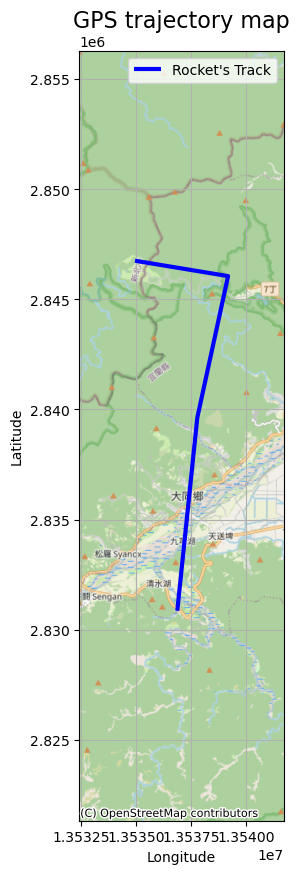

In [22]:
# geometry = [LineString(zip(cur_lon, cur_lat))]
geometry = [LineString(zip(test_lon, test_lat))] # testing gps data, need to change to real data
gdf = gpd.GeoDataFrame(geometry=geometry, crs="EPSG:4326")  # WGS84
gdf_web = gdf.to_crs(epsg=3857)

# set the size and resolution of the plot
fig, ax = plt.subplots(figsize=(10, 10))
gdf_web.plot(ax=ax, linewidth=3, color='blue')

# Get current tight limits
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Add 10% padding around the track
x_pad = (xlim[1] - xlim[0]) * 0.5
y_pad = (ylim[1] - ylim[0]) * 0.5

# Set expanded limits
ax.set_xlim(xlim[0] - x_pad, xlim[1] + x_pad)
ax.set_ylim(ylim[0] - y_pad, ylim[1] + y_pad)

# Add OpenStreetMap tiles as background
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)

plt.legend(["Rocket's Track"], loc='upper right', fontsize=10)
plt.title("GPS trajectory map", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

**to-do list**

製作
- 做Lora穩定度分析圖

落點分析比對圖 :

In [23]:
# activate the function to run
gps_to_enu(cur_lat, cur_lon, cur_alt, ref_lat, ref_lon, 0)

# get function's return value
east, north, up = gps_to_enu(cur_lat, cur_lon, cur_alt, ref_lat, ref_lon, 0)

/var/folders/l1/jx5mkr797y7df386wz0kstrm0000gn/T/ipykernel_90878/1741131265.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_east = float(east[max_idx])
/var/folders/l1/jx5mkr797y7df386wz0kstrm0000gn/T/ipykernel_90878/1741131265.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  landing_east = float(east[-1])


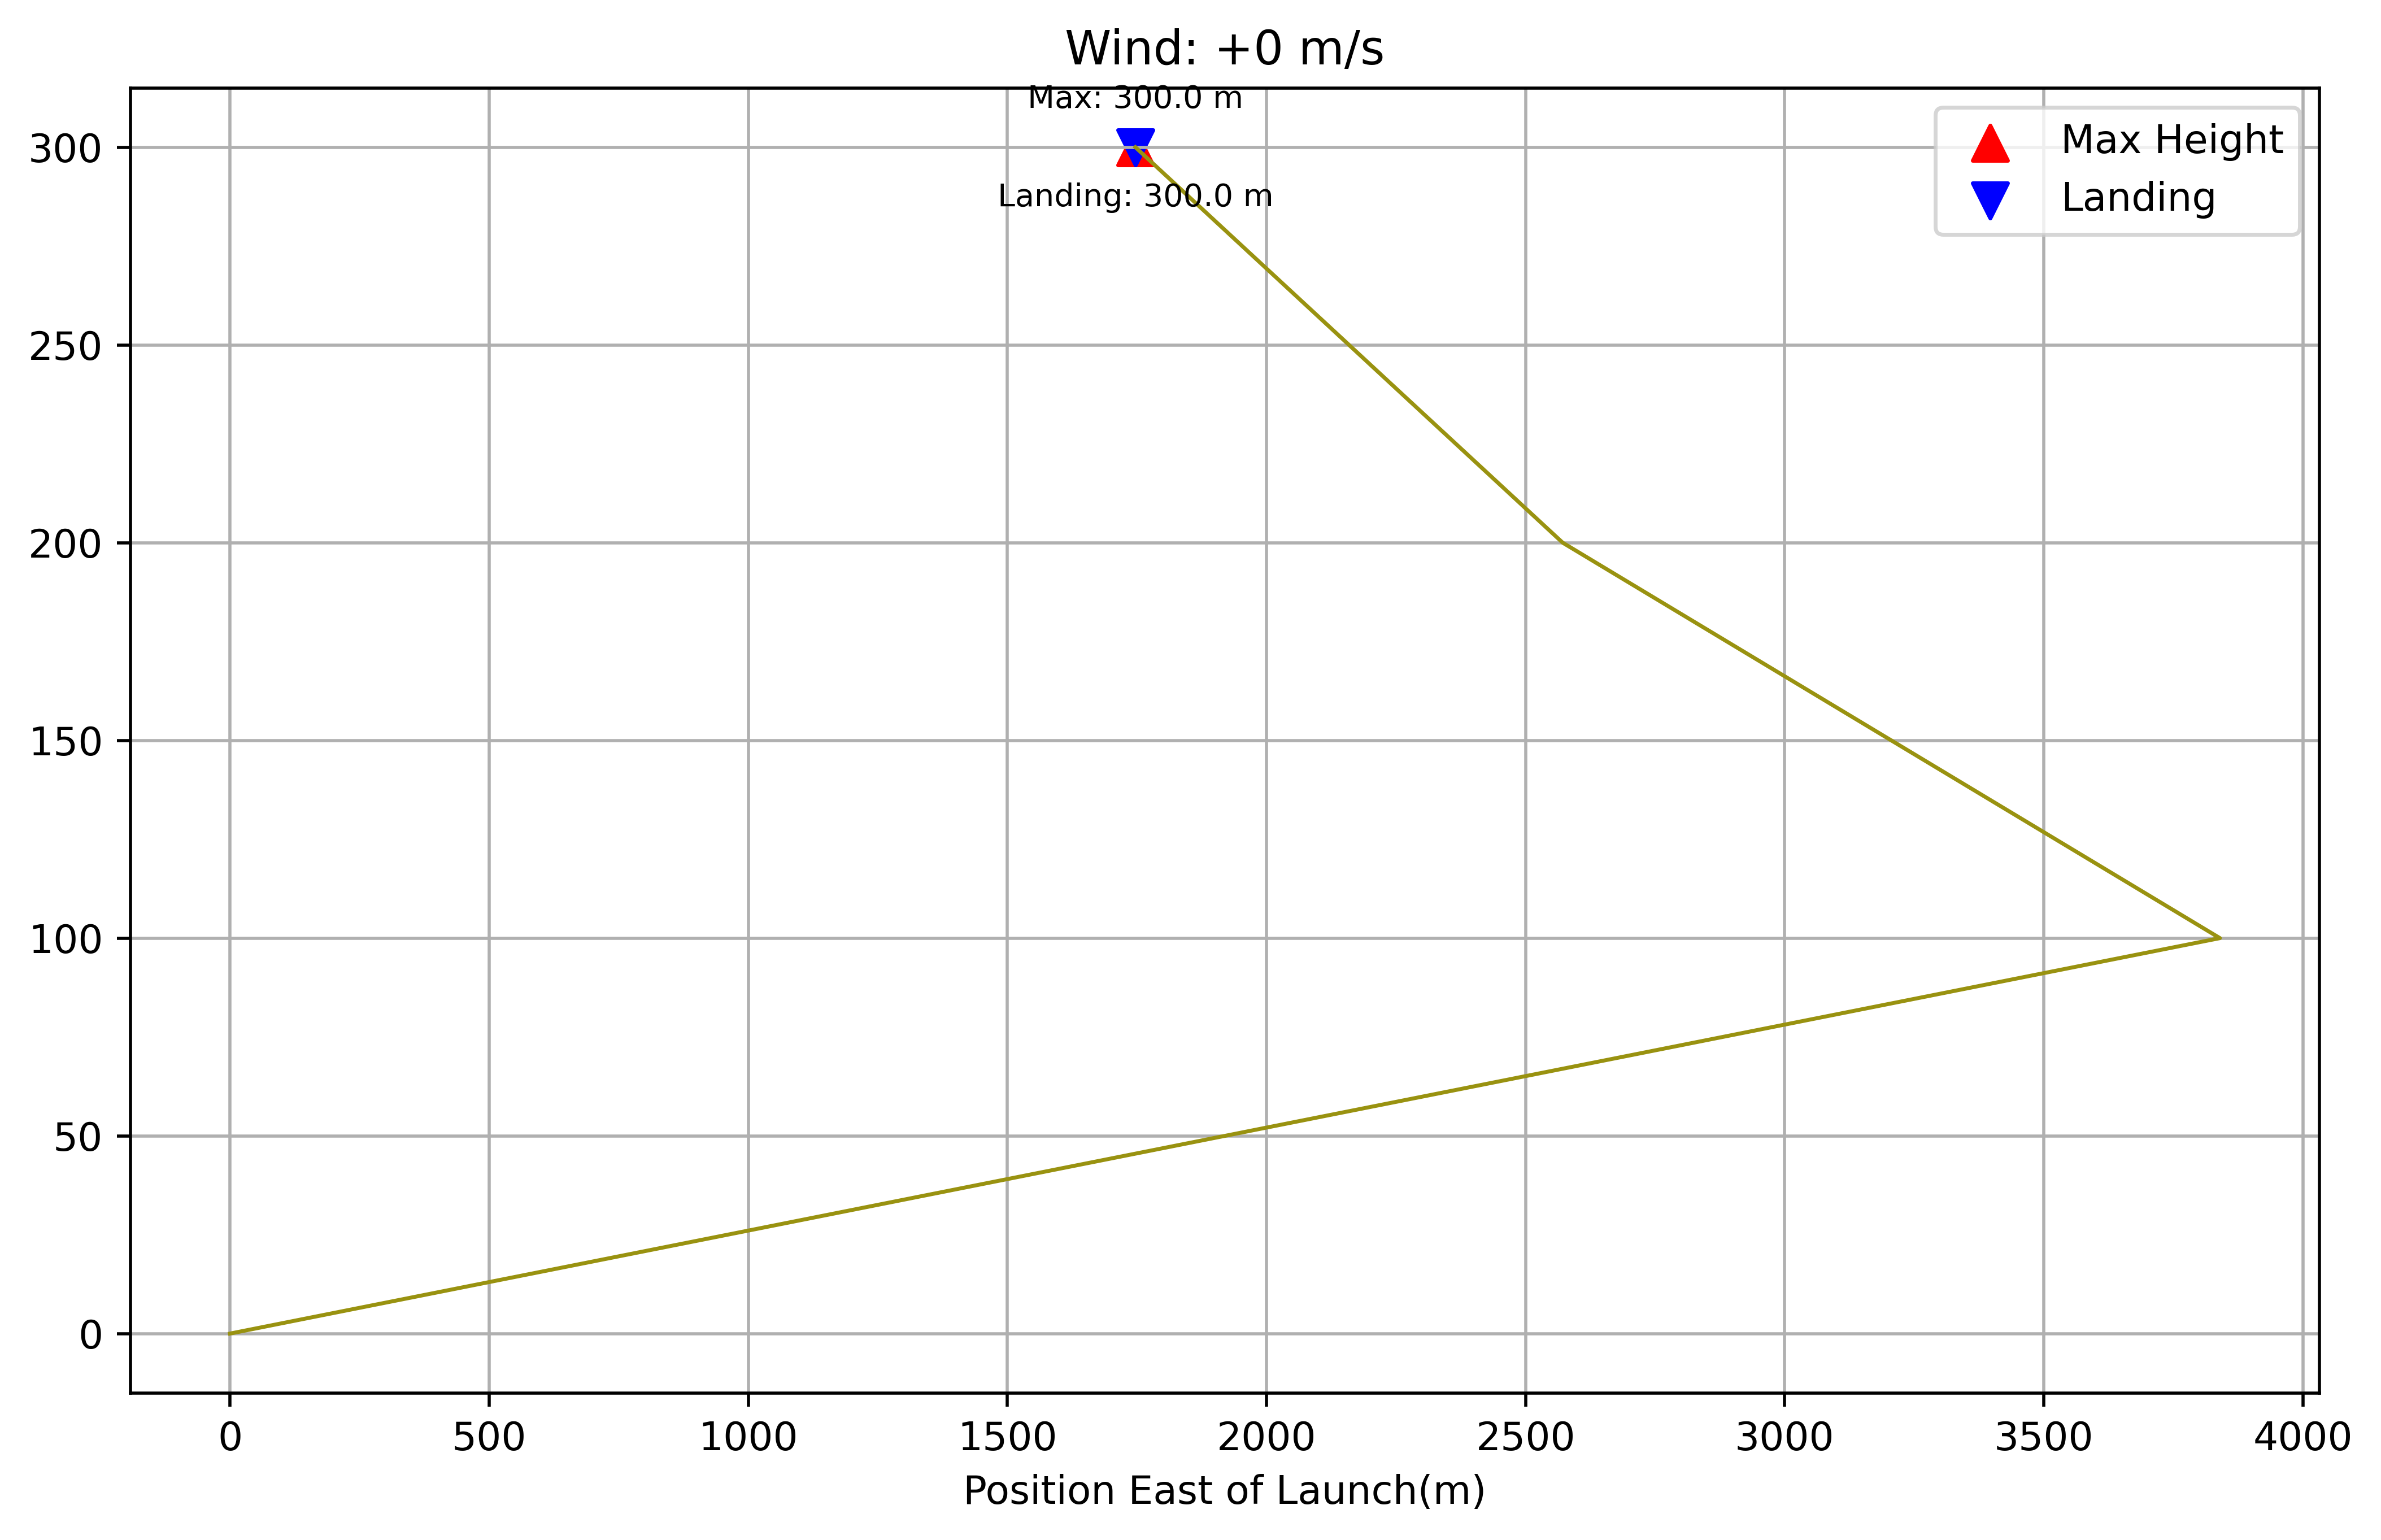

In [24]:
# update the resolution of the plot
fig, ax = plt.subplots(figsize=(10, 6), dpi=500)

# find max height
max_idx = np.argmax(up)
max_east = float(east[max_idx])
max_up = float(up[max_idx])

# find landing point (last point)
landing_east = float(east[-1])
landing_up = float(up[-1])

# plot the data
plt.plot(east, up, linewidth=1, color=line1_color)

# mark max height
ax.scatter(max_east, max_up, color='red', marker='^', s=80, label='Max Height')
ax.annotate(f'Max: {max_up:.1f} m', (max_east, max_up), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

# mark landing point
ax.scatter(landing_east, landing_up, color='blue', marker='v', s=80, label='Landing')
ax.annotate(f'Landing: {landing_up:.1f} m', (landing_east, landing_up), textcoords="offset points", xytext=(0,-15), ha='center', fontsize=8)

# set x-axis label with unit
plt.xlabel('Position East of Launch(m)')

# set legend
plt.legend(loc='best')

plt.title('Wind: +0 m/s') # change this manually with wind speed ("+" sign means wind is blowing to the east)
plt.grid(True)
plt.show()